In [1]:
import pandas as pd

file_path = '../data/gene_count_matrix.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
           gene_id  SRR10676821_stringtieRef  SRR10676822_stringtieRef  \
0  ENSG00000282222                         0                         0   
1  ENSG00000282221                         0                         0   
2  ENSG00000212040                         0                         0   
3  ENSG00000110514                      3568                      7327   
4  ENSG00000086015                      9050                     15786   

   SRR10676823_stringtieRef  SRR10676824_stringtieRef  

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


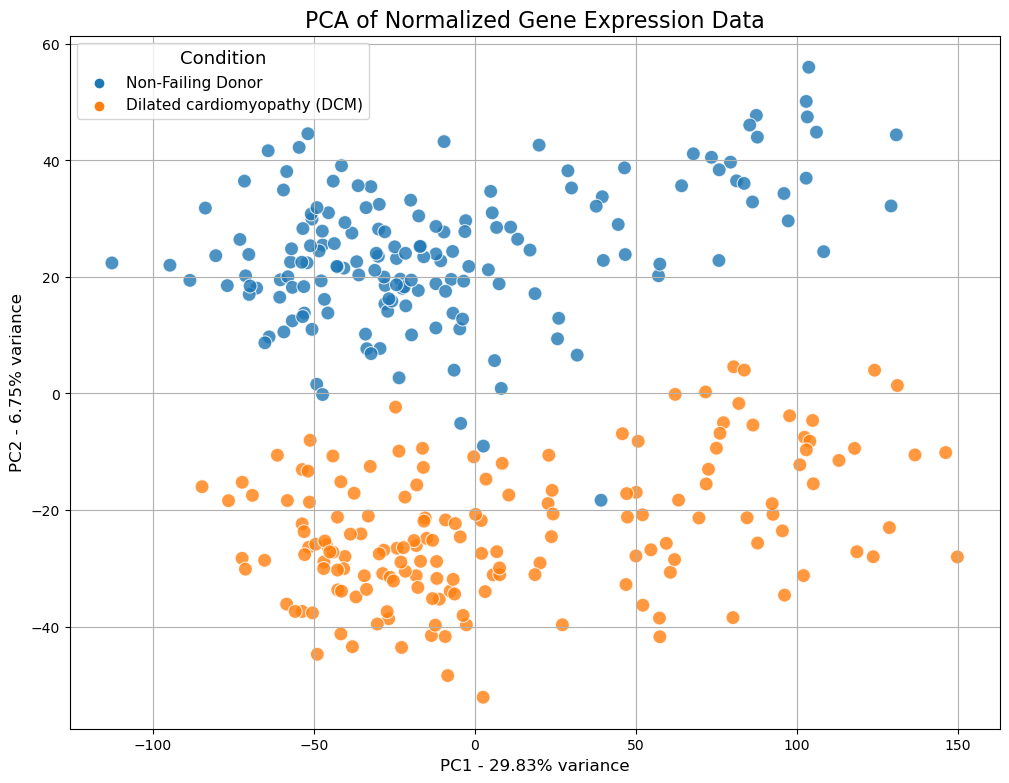

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized gene expression data
normalized_counts_path = '../data/normalized_gene_counts.csv'
normalized_df = pd.read_csv(normalized_counts_path, index_col=0)

# Transpose the data for PCA (samples as rows, genes as columns)
X = normalized_df.T

# Load metadata to get sample conditions
metadata_path = '../data/MAGE_metadata.txt'
metadata_df = pd.read_csv(metadata_path)

# Filter metadata to match the samples in our normalized data
filtered_metadata = metadata_df[metadata_df["Run"].isin(X.index)]

# Create a mapping from Run to etiology for coloring the plot
etiology_map = filtered_metadata.set_index('Run')['etiology']
conditions = X.index.map(etiology_map)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=X.index)
pc_df['Condition'] = conditions

# Plot the PCA results
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pc_df, s=100, alpha=0.8)
plt.title('PCA of Normalized Gene Expression Data', fontsize=16)
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance', fontsize=12)
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance', fontsize=12)
plt.legend(title='Condition', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.show()